# **Project Name** - Cardiovascular Risk Prediction



##### **Project Type**    - Unsupervised

# **Project Summary -**

This project aims to develop a machine learning model to predict the 10-year risk of coronary heart disease (CHD) using demographic, behavioral, and medical factors. The dataset consists of 4,000 records and 15 attributes from a cardiovascular study in Framingham, Massachusetts. The project follows a systematic approach, starting with data exploration, preprocessing, and feature selection. Machine learning models like logistic regression, decision trees, random forests, and support vector machines are trained and evaluated using appropriate metrics. Hyperparameter tuning techniques are applied to optimize model performance. By completing this project, we can gain insights into cardiovascular risk prediction, helping medical professionals identify high-risk individuals and implement preventive measures. This contributes to improved understanding and treatment strategies for CHD.

# **Problem Statement**


Develop a machine learning model to predict the 10-year risk of future coronary heart disease (CHD) in individuals using demographic, behavioral, and medical risk factors. The goal is to accurately classify individuals as having a high or low risk of CHD based on the provided dataset of 4,000 records and 15 attributes.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all the columns in the dataframe
pd.pandas.set_option("display.max_columns", None)

### Dataset Loading

In [2]:
# Load Dataset
CHD_data=pd.read_csv("C:\\Users\\rajeev\\Downloads\\data_cardiovascular_risk.csv")

### Dataset First View

In [3]:
# Dataset First Look
CHD_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
CHD_data.shape

(3390, 17)

### Dataset Information

In [5]:
# Dataset Info
CHD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
CHD_data.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
CHD_data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
## Missing Value Percentage
missing_percnt=CHD_data.isnull().sum()/len(CHD_data)*100
missing_percnt

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

Text(0.5, 1.0, 'Missing Values')

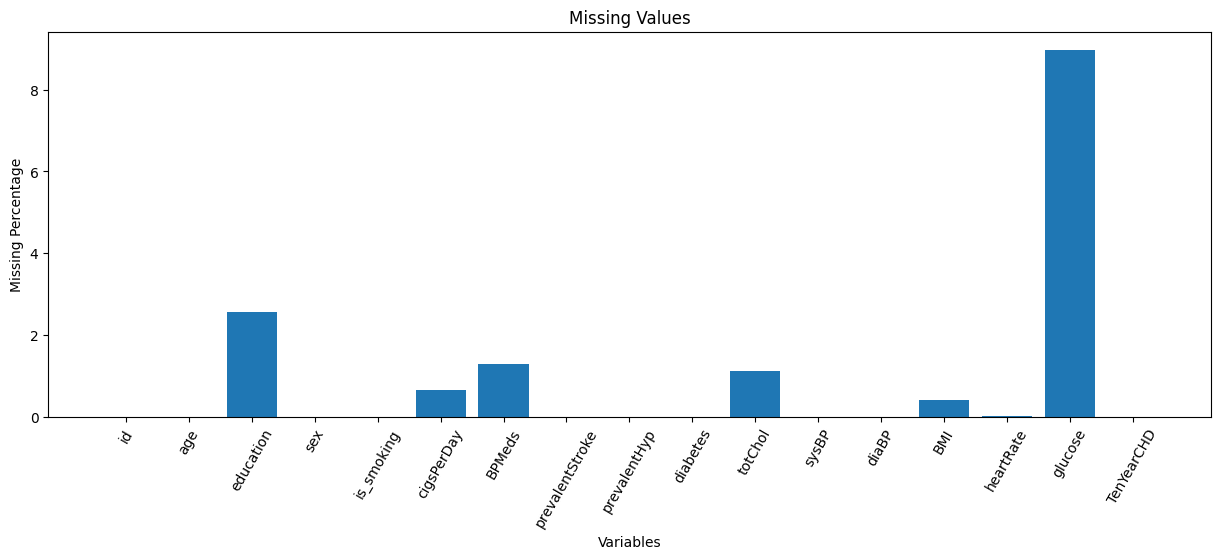

In [9]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
plt.bar(missing_percnt.index, missing_percnt)
plt.xticks(rotation=60)
plt.xlabel("Variables")
plt.ylabel("Missing Percentage")
plt.title("Missing Values")

### What did you know about your dataset?

The dataset used in the project is derived from an ongoing cardiovascular study conducted on residents of the town of Framingham, Massachusetts. It contains 4,000 records and 15 attributes, each representing potential risk factors for cardiovascular disease. The dataset includes a combination of demographic, behavioral, and medical variables.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
CHD_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe
CHD_data.describe().round(2)

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3390.00,3303.00,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
mean,1694.50,49.54,1.97,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,978.75,8.59,1.02,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,847.25,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,1694.50,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,2541.75,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,3389.00,70.00,4.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


### Variables Description

1. 'id': An identifier for each record.
2. 'age': The age of the individual.
3. 'education': The level of education of the individual.
4. 'sex': The gender of the individual (Male or Female).
5. 'is_smoking': Indicates whether the individual is a smoker (Yes or No).
6. 'cigsPerDay': The number of cigarettes smoked per day by the individual.
7. 'BPMeds': Indicates whether the individual is taking blood pressure medication (Yes or No).
8. 'prevalentStroke': Indicates whether the individual has a history of stroke (Yes or No).
9. 'prevalentHyp': Indicates whether the individual has prevalent hypertension (Yes or No).
10. 'diabetes': Indicates whether the individual has diabetes (Yes or No).
11. 'totChol': Total cholesterol level of the individual.
12. 'sysBP': Systolic blood pressure of the individual.
13. 'diaBP': Diastolic blood pressure of the individual.
14. 'BMI': Body mass index of the individual.
15. 'heartRate': Heart rate of the individual.
16. 'glucose': Blood glucose level of the individual.
17. 'TenYearCHD': The target variable indicating the 10-year risk of coronary heart disease (CHD) for the individual (0: No risk, 1: High risk).

### Check Unique Values for each variable.

In [12]:
CHD_data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready. 
print(f" Minimum age- {CHD_data['age'].min()}")
print(f" Maximum age- {CHD_data['age'].max()}")

 Minimum age- 32
 Maximum age- 70


In [14]:
# Detecting Leading/ Trailing Space and removing it
for col in CHD_data:
    if CHD_data[col].dtype==object:
        CHD_data[col]=CHD_data[col].str.strip()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='TenYearCHD', ylabel='age'>

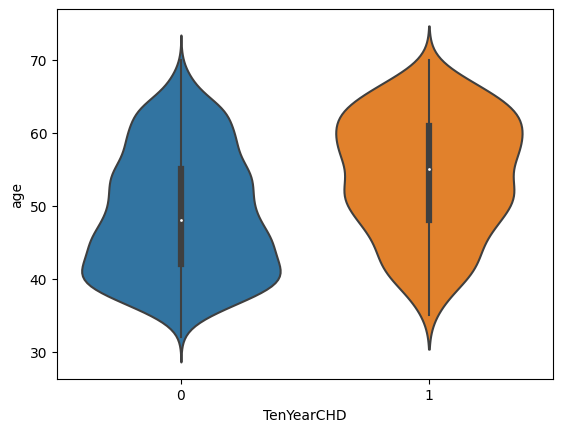

In [15]:
# Chart - 1 visualization code
sns.violinplot(x=CHD_data["TenYearCHD"], y=CHD_data["age"])

##### What is/are the insight(s) found from the chart?

The likelihood of developing coronary heart disease (CHD) ranges significantly, spanning from 50% to 65%.

#### Chart - 2

<Axes: xlabel='sex', ylabel='count'>

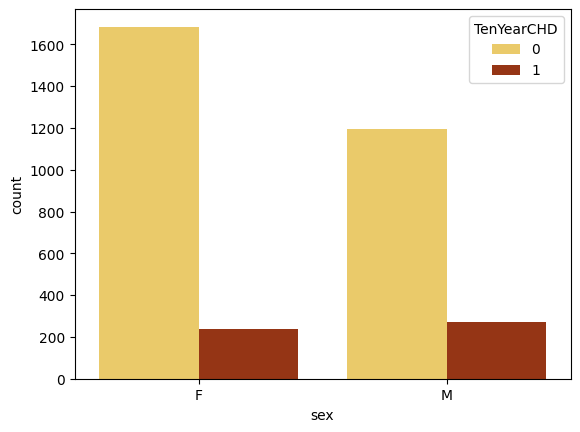

In [16]:
# Chart - 2 visualization code
sns.countplot(x="sex",hue="TenYearCHD",data=CHD_data, palette="afmhot_r")

##### What is/are the insight(s) found from the chart?

Females have a higher probability of not having the disease, while males have a higher likelihood of being affected by it.

#### Chart - 3

<Axes: >

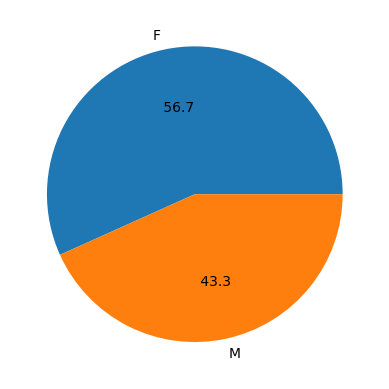

In [17]:
# Chart - 3 visualization code
CHD_data.groupby("sex").size().plot(kind="pie", autopct="% .1f")

##### 1. Why did you pick the specific chart?

I uesd to visualize the distribution of males and females in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The dataset exhibits a higher representation of females, which could potentially impact the disease ratio between males and females.

#### Chart - 4

<Axes: xlabel='is_smoking', ylabel='count'>

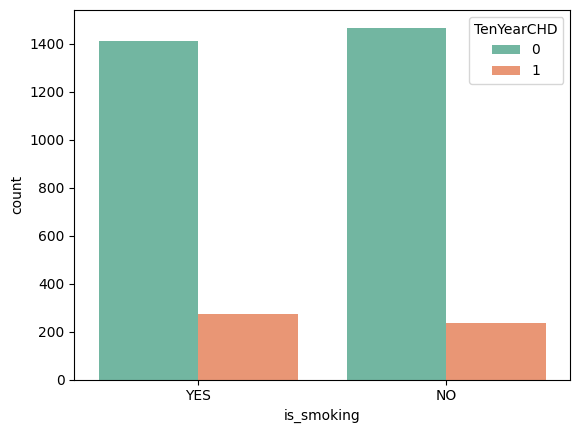

In [18]:
# Chart - 4 visualization code
sns.countplot(x="is_smoking", hue="TenYearCHD", data=CHD_data, palette="Set2")

#####  What is/are the insight(s) found from the chart?

While it is evident that smokers have a higher likelihood of developing the disease, the graph suggests that smoking alone may not be a significant determining factor.

#### Chart - 5

<Axes: >

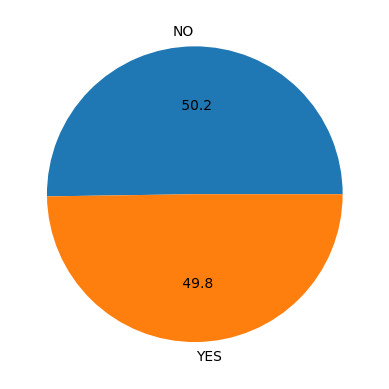

In [19]:
# Chart - 5 visualization code
CHD_data.groupby("is_smoking").size().plot(kind="pie", autopct="% .1f")

##### What is/are the insight(s) found from the chart?

The Smokers and non-smokers are equally distributed.

#### Chart - 6

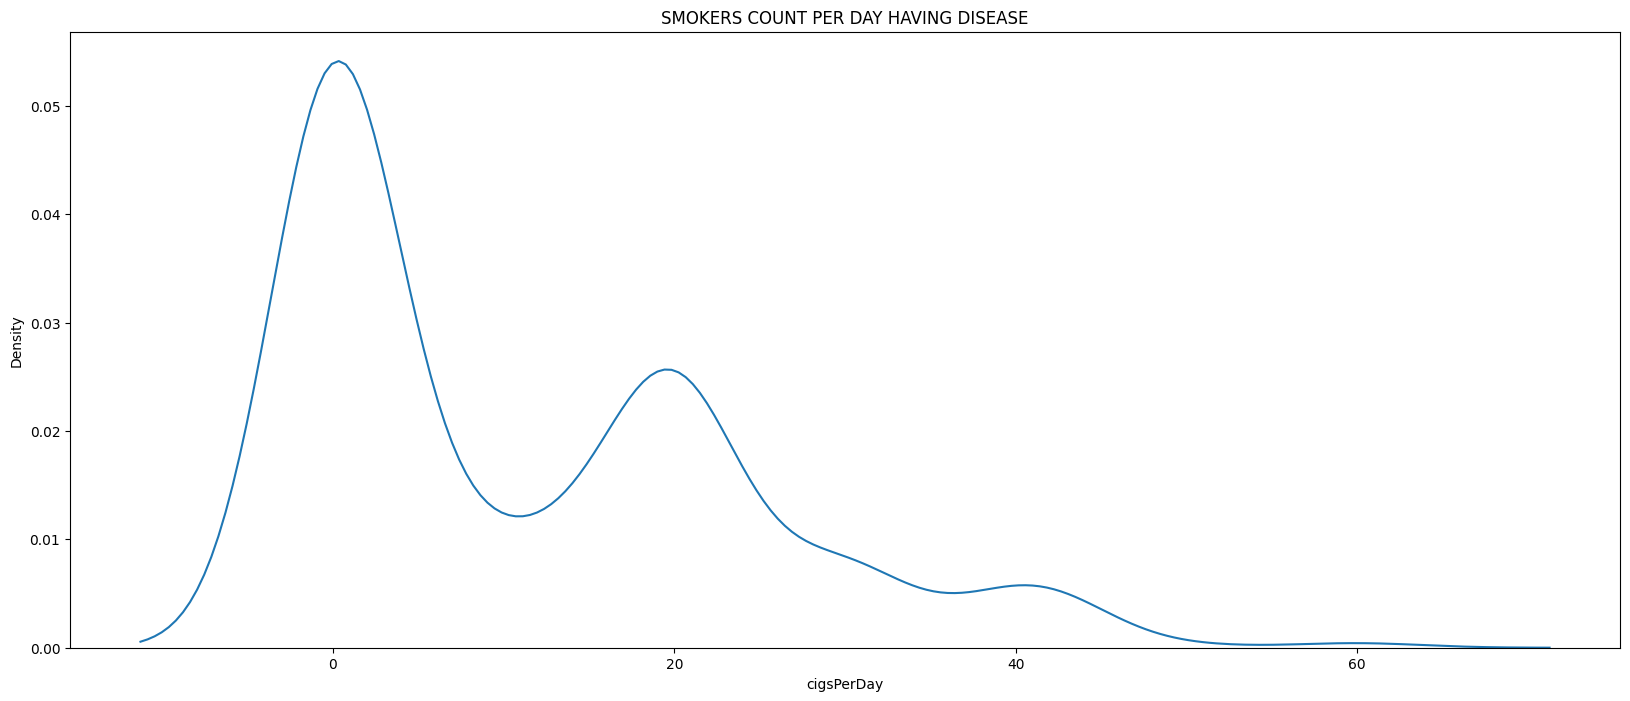

In [20]:
# Chart - 6 visualization code
fig, axes = plt.subplots(figsize=(20, 8))
sns.kdeplot(data=CHD_data[CHD_data["TenYearCHD"]==1], x="cigsPerDay")
plt.title("SMOKERS COUNT PER DAY HAVING DISEASE")
plt.show()

##### 1.What is/are the insight(s) found from the chart?

The observation of individuals who smoke fewer cigarettes per day having a higher risk of disease is indeed unusual. It is possible that there may be some flaws or inconsistencies within the "cigsperday" dataset that are influencing this unexpected outcome. Further investigation and verification of the dataset may be necessary to address this discrepancy.

#### Chart - 7

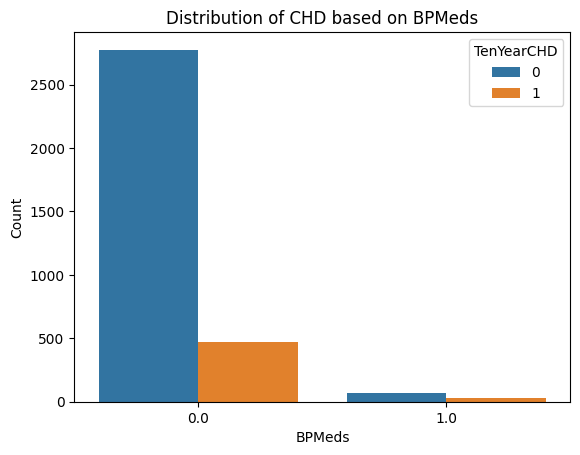

In [21]:
# Chart - 7 visualization code
sns.countplot(data=CHD_data, x="BPMeds", hue="TenYearCHD")
plt.title("Distribution of CHD based on BPMeds")
plt.xlabel("BPMeds")
plt.ylabel("Count")
plt.show()


#####  What is/are the insight(s) found from the chart?

There is a notable correlation between patients who take blood pressure medications (BPMeds) and a reduced likelihood of developing the disease.

#### Chart - 8

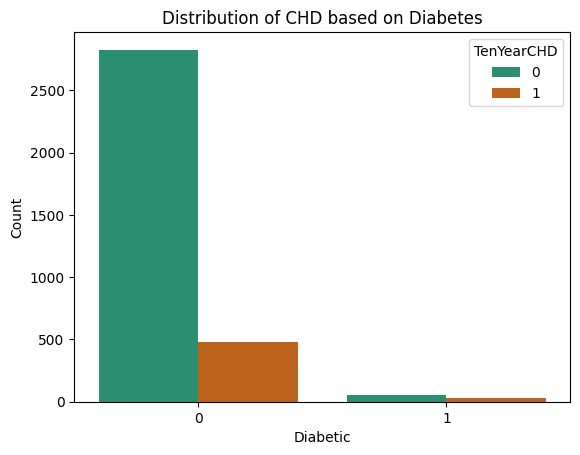

In [22]:
# Chart - 8 visualization code
sns.countplot(data=CHD_data, x="diabetes", hue="TenYearCHD", palette="Dark2")
plt.title("Distribution of CHD based on Diabetes")
plt.xlabel("Diabetic")
plt.ylabel("Count")
plt.show()


##### What is/are the insight(s) found from the chart?

Individuals who have diabetes appear to be less affected by the disease.

#### Chart - 9

Text(0.5, 1.0, 'Low BP')

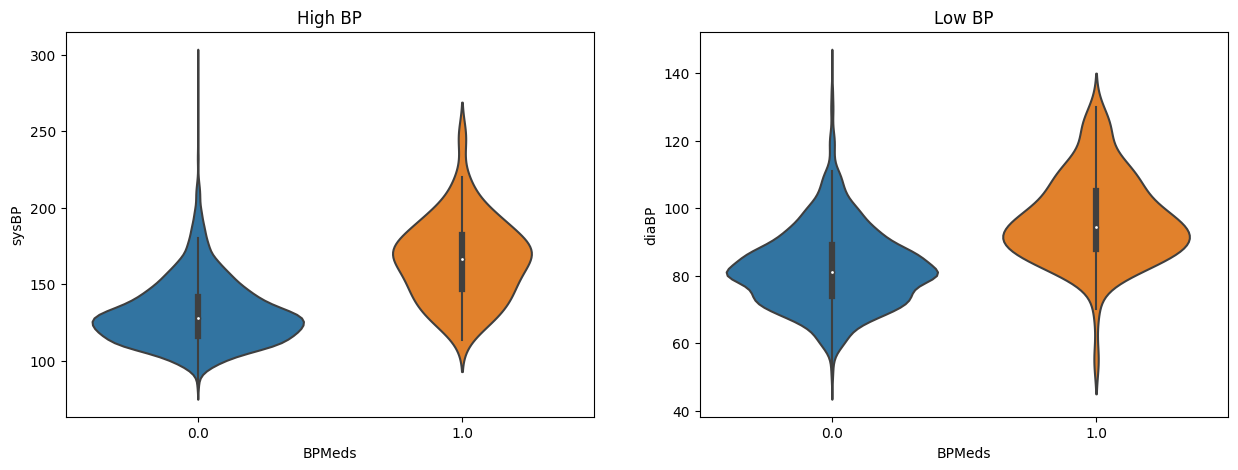

In [23]:
# Chart - 9 visualization code
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.violinplot(x=CHD_data["BPMeds"], y=CHD_data["sysBP"], ax=axes[0])
axes[0].set_title("High BP")

sns.violinplot(x=CHD_data["BPMeds"], y=CHD_data["diaBP"], ax=axes[1])
axes[1].set_title("Low BP")

##### What is/are the insight(s) found from the chart?

Based on the graph, it is evident that individuals with higher systolic blood pressure (BP) levels, ranging from 150 to 200, have a higher prevalence of the disease. Conversely, those who do not have the disease tend to fall within the lower systolic BP range of 100 to 120, which aligns with medical guidelines indicating that values above 120 are unfavorable.

Regarding diastolic blood pressure, individuals with readings in the range of 80 to 100 exhibit a greater incidence of the disease, whereas those without the disease tend to have a diastolic BP of 80. This observation is consistent with guidelines suggesting that values below 80 are considered desirable.

#### Chart - 10

Text(0.5, 1.0, 'Low BP')

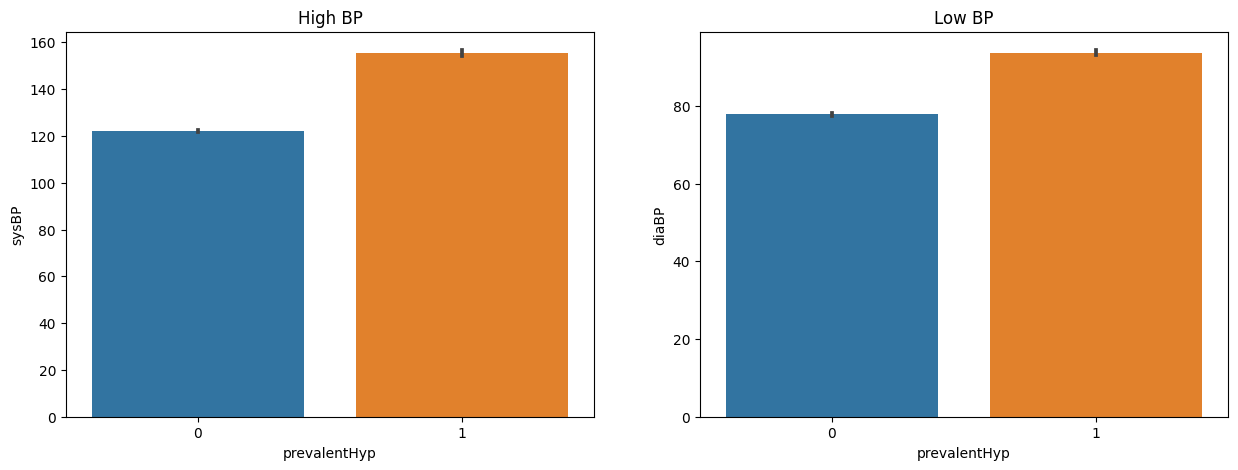

In [24]:
# Chart - 10 visualization code
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.barplot(data=CHD_data, x="prevalentHyp", y=CHD_data["sysBP"], ax=axes[0])
axes[0].set_title("High BP")

sns.barplot(data=CHD_data, x="prevalentHyp", y=CHD_data["diaBP"], ax=axes[1])
axes[1].set_title("Low BP")

##### What is/are the insight(s) found from the chart?

The presence of a hypertension history appears to have an impact on blood pressure (BP) levels.

#### Chart - 11

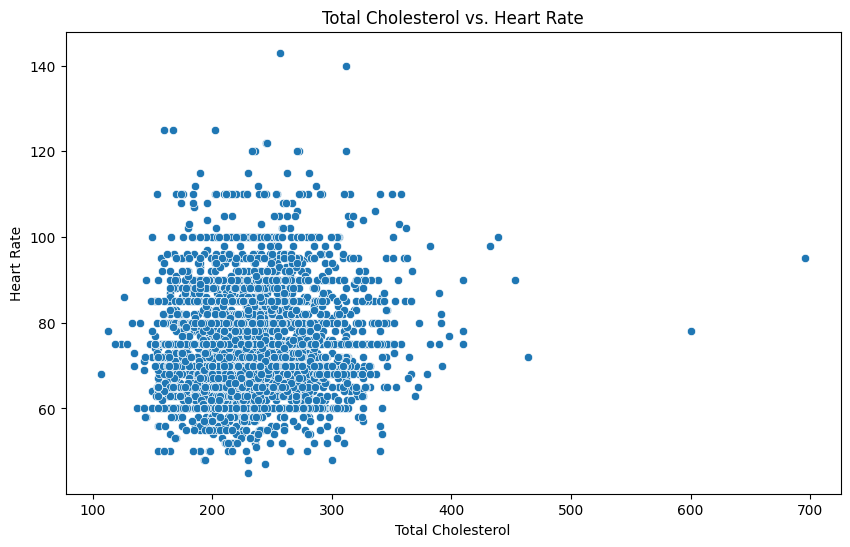

In [25]:
# Chart - 11 visualization code
fig, axes = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=CHD_data, x="totChol", y="heartRate")
plt.title("Total Cholesterol vs. Heart Rate")
plt.xlabel("Total Cholesterol")
plt.ylabel("Heart Rate")
plt.show()


##### What is/are the insight(s) found from the chart?

The graph indicates that there is no discernible linear relationship between cholesterol levels and heart rate.

#### Chart - 12

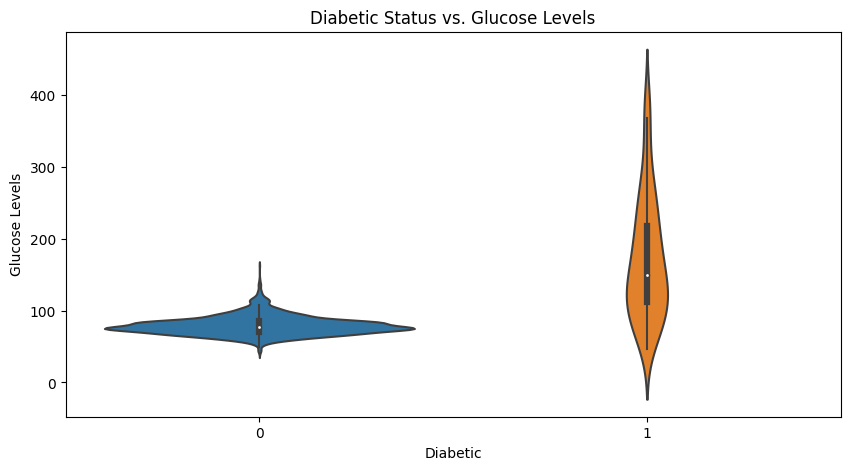

In [26]:
# Chart - 12 visualization code
fig, axes = plt.subplots(figsize=(10,5))
sns.violinplot(data=CHD_data, x="diabetes", y="glucose")
plt.title("Diabetic Status vs. Glucose Levels")
plt.xlabel("Diabetic")
plt.ylabel("Glucose Levels")
plt.show()


##### What is/are the insight(s) found from the chart?

The data suggests that individuals with a glucose level below 100 have a lower probability of having diabetes, while those with glucose levels above 100 exhibit a higher likelihood of being diagnosed with diabetes.

#### Chart - 13

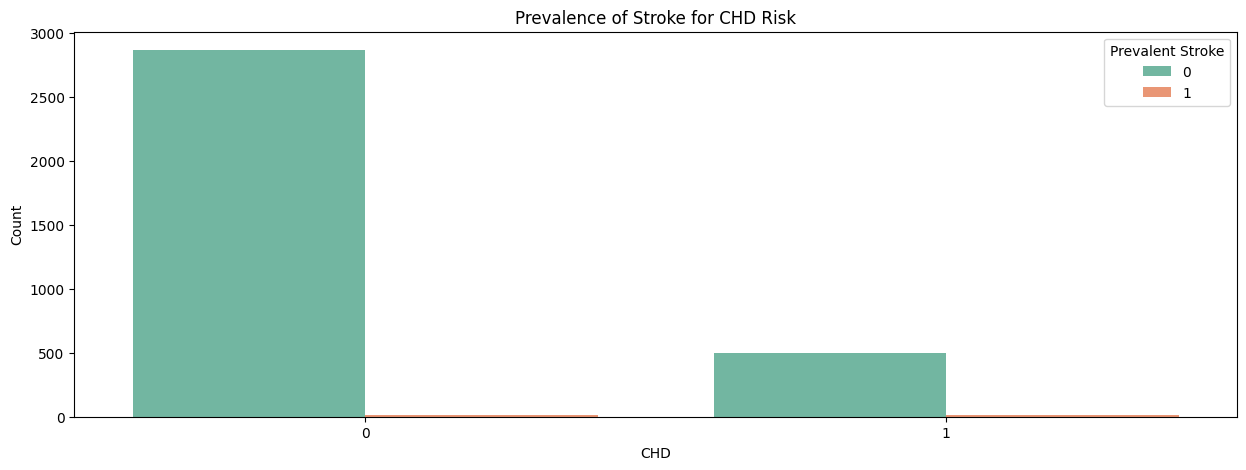

In [27]:
# Chart - 13 visualization code
plt.figure(figsize=(15, 5))
sns.countplot(data=CHD_data, x="TenYearCHD", hue="prevalentStroke", palette="Set2")
plt.title("Prevalence of Stroke for CHD Risk")
plt.xlabel("CHD")
plt.ylabel("Count")
plt.legend(title="Prevalent Stroke", loc="upper right")
plt.show()


#####  What is/are the insight(s) found from the chart?

The data indicates a negligible likelihood of individuals with a history of stroke having the disease, which is quite unusual. This observation may be due to the limited amount of data available for individuals with a history of stroke, resulting in a smaller representation on the graph. It is important to consider the potential impact of data scarcity on the observed trend.. 

#### Chart - 14 - Pair Plot

C:\Users\rajeev\AppData\Local\Temp\ipykernel_8048\2517317205.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "sysBP"], shade=True, ax=axes[0, 0])
C:\Users\rajeev\AppData\Local\Temp\ipykernel_8048\2517317205.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "diaBP"], shade=True, ax=axes[0, 1])
C:\Users\rajeev\AppData\Local\Temp\ipykernel_8048\2517317205.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "totChol"], shade=True, ax=axes[1, 0])
C:\Users\rajeev\AppData\Local\Temp\ipykerne

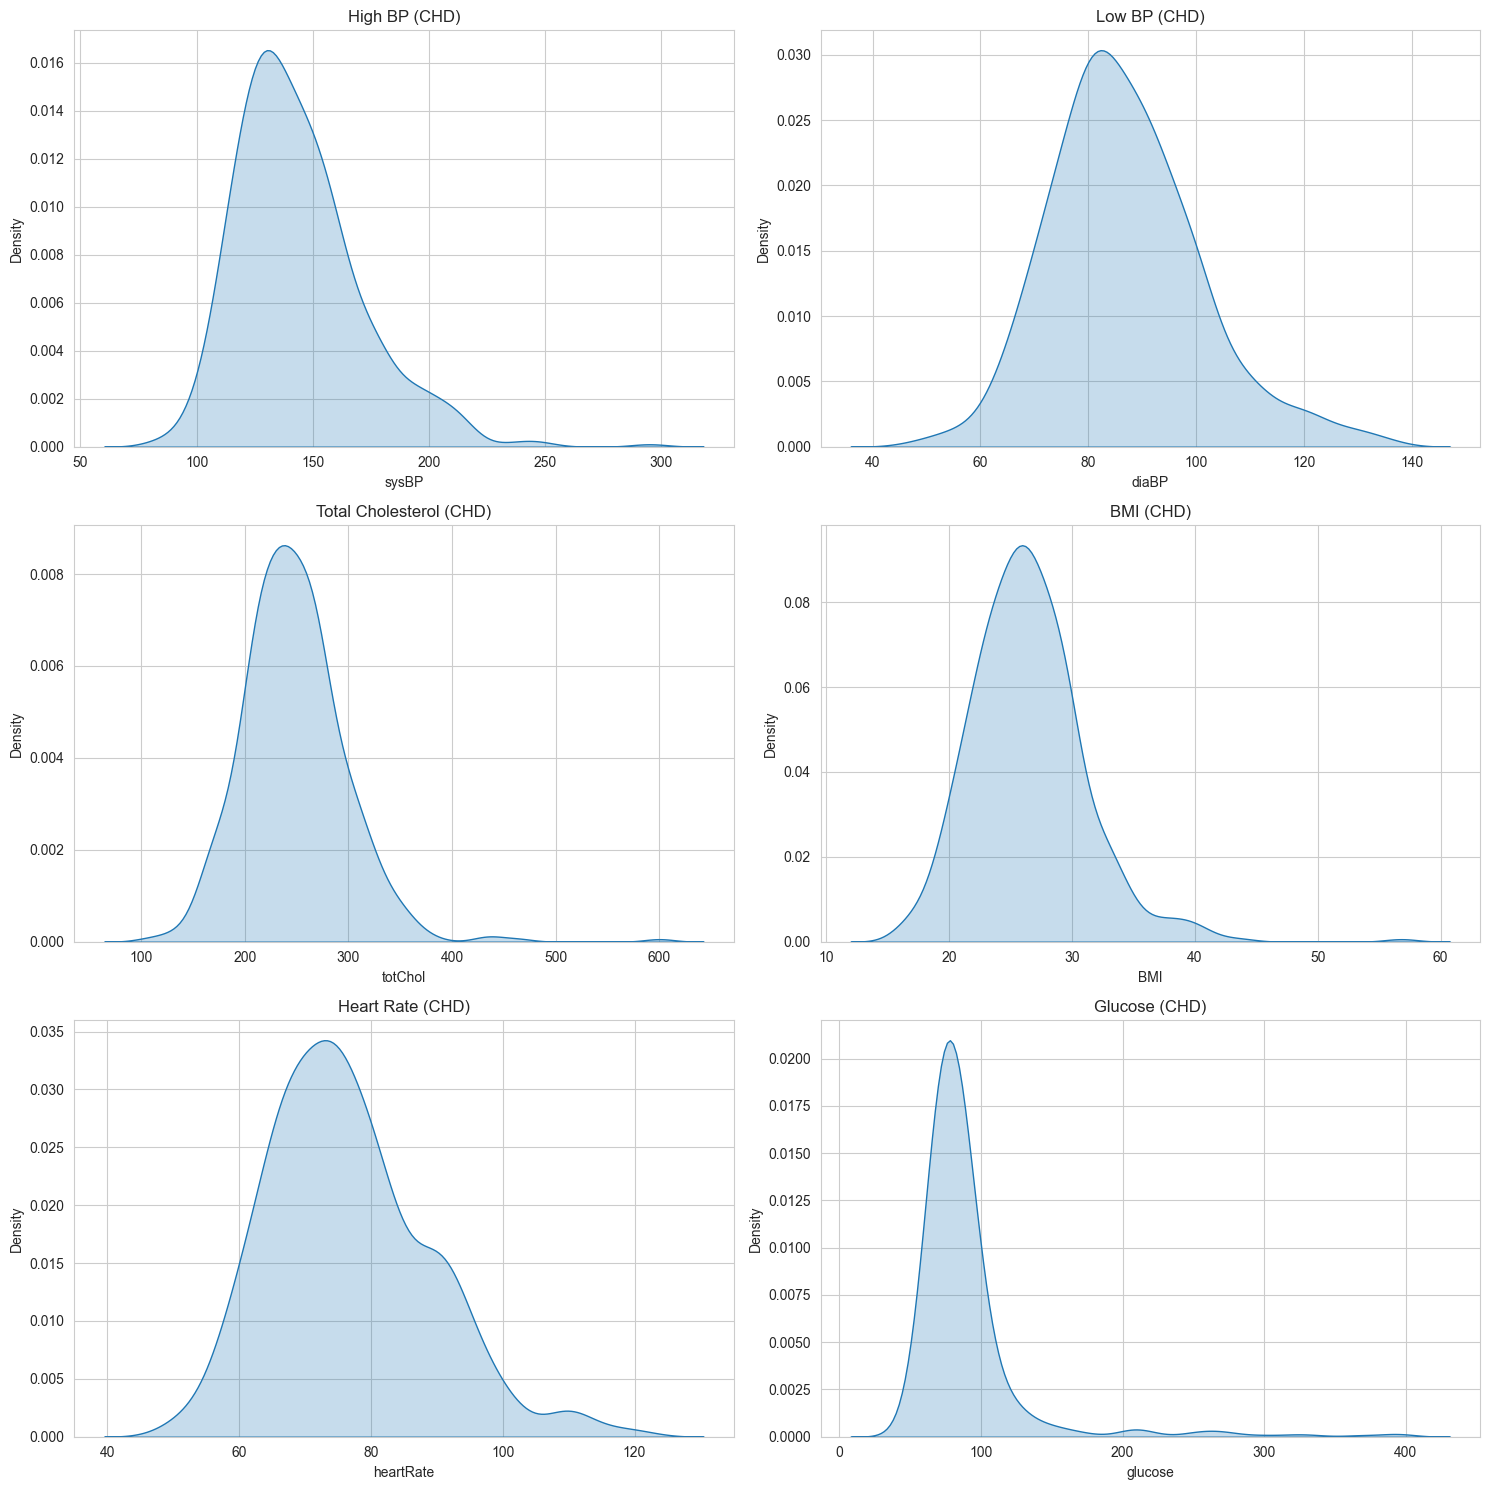

In [28]:
# Pair Plot visualization code
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15,15))

sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "sysBP"], shade=True, ax=axes[0, 0])
axes[0, 0].set_title("High BP (CHD)")

sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "diaBP"], shade=True, ax=axes[0, 1])
axes[0, 1].set_title("Low BP (CHD)")

sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "totChol"], shade=True, ax=axes[1, 0])
axes[1, 0].set_title("Total Cholesterol (CHD)")

sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "BMI"], shade=True, ax=axes[1, 1])
axes[1, 1].set_title("BMI (CHD)")

sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "heartRate"], shade=True, ax=axes[2, 0])
axes[2, 0].set_title("Heart Rate (CHD)")

sns.kdeplot(x=CHD_data.loc[CHD_data["TenYearCHD"] == 1, "glucose"], shade=True, ax=axes[2, 1])
axes[2, 1].set_title("Glucose (CHD)")

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

In the pairplot having graph of diffrent column shows distribution of having CHD with diffrent diffrent factors.

## ***5. Hypothesis Testing***

Hypothesis Statement 1: There is a significant association between smoking status and the occurrence of TenYearCHD.

Hypothesis Statement 2: There is a significant difference in the age distribution between individuals with and without TenYearCHD.

Hypothesis Statement 3: There is a significant relationship between diabetes and the prevalence of TenYearCHD.

### Hypothetical Statement - 1


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

smoking_crosstab = pd.crosstab(CHD_data['is_smoking'], CHD_data['TenYearCHD'])
chi2, p_value, dof, expected = chi2_contingency(smoking_crosstab)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between smoking status and TenYearCHD.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between smoking status and TenYearCHD.")


Fail to reject the null hypothesis. There is no significant association between smoking status and TenYearCHD.


##### Which statistical test have you done to obtain P-Value?

Chi Square Test

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

chd_yes_age = CHD_data[CHD_data['TenYearCHD'] == 1]['age']
chd_no_age = CHD_data[CHD_data['TenYearCHD'] == 0]['age']

t_statistic, p_value = ttest_ind(chd_yes_age, chd_no_age)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the age distribution between individuals with and without TenYearCHD.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the age distribution between individuals with and without TenYearCHD.")


Reject the null hypothesis. There is a significant difference in the age distribution between individuals with and without TenYearCHD.


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Statement 3: There is a significant relationship between diabetes and the prevalence of TenYearCHD.
Null Hypothesis (H0): There is no significant relationship between diabetes and TenYearCHD.
Alternative Hypothesis (H1): There is a significant relationship between diabetes and TenYearCHD.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
diabetes_crosstab = pd.crosstab(CHD_data['diabetes'], CHD_data['TenYearCHD'])
chi2, p_value, dof, expected = chi2_contingency(diabetes_crosstab)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between diabetes and TenYearCHD.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between diabetes and TenYearCHD.")


Reject the null hypothesis. There is a significant relationship between diabetes and TenYearCHD.


##### Which statistical test have you done to obtain P-Value?

Chi-square test of independence

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments
## Creating a function for detecting outliers

def calculate_outlier(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] > upper) | (df[column] < lower)]
    percent_outliers = round((outliers.shape[0] / df.shape[0]) * 100, 2)
    return lower, upper, percent_outliers

In [33]:
### For Cholestrol

lower_range,upper_range, outliers_percnt=calculate_outlier(CHD_data, "totChol")
print("lower cholestrol",(lower_range))
print("Upper Cholestrol", (upper_range))
print("Outlier Percentage", (outliers_percnt))

lower cholestrol 119.0
Upper Cholestrol 351.0
Outlier Percentage 1.27


In [34]:
CHD_data.loc[CHD_data["totChol"]> upper_range, "totChol"]=351

In [35]:
# Checking
CHD_data.loc[CHD_data["totChol"]>351]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [36]:
### For Systolic BP(High BP)
lower_rangee,upper_rangee, outliers_percent=calculate_outlier(CHD_data, "sysBP")
print("lower SysBP",(lower_rangee))
print("Upper SysBP", (upper_rangee))
print("Outlier Percentage", (outliers_percent))

lower SysBP 76.5
Upper SysBP 184.5
Outlier Percentage 3.1


In [37]:
CHD_data.loc[CHD_data["sysBP"]> upper_rangee, "sysBP"]=184

In [38]:
### For Diasystolic BP(Low BP)
lower_band,upper_band, outliers_prcnt=calculate_outlier(CHD_data, "diaBP")
print("lower SysBP",(lower_band))
print("Upper SysBP", (upper_band))
print("Outlier Percentage", (outliers_prcnt))

lower SysBP 51.25
Upper SysBP 113.25
Outlier Percentage 1.71


In [39]:
CHD_data.loc[CHD_data["diaBP"]>upper_band, "diaBP"]=113

In [40]:
### For BMI
lower_BMI,upper_BMI, bmi_outliers_prcnt=calculate_outlier(CHD_data, "BMI")
print("lower BMI range",(lower_BMI))
print("Upper BMI range", (upper_BMI))
print("BMI_Outlier Percentage", (bmi_outliers_prcnt))

lower BMI range 15.49
Upper BMI range 35.57
BMI_Outlier Percentage 2.27


In [41]:
print(f" BMI Range- {CHD_data['BMI'].max()}")

 BMI Range- 56.8


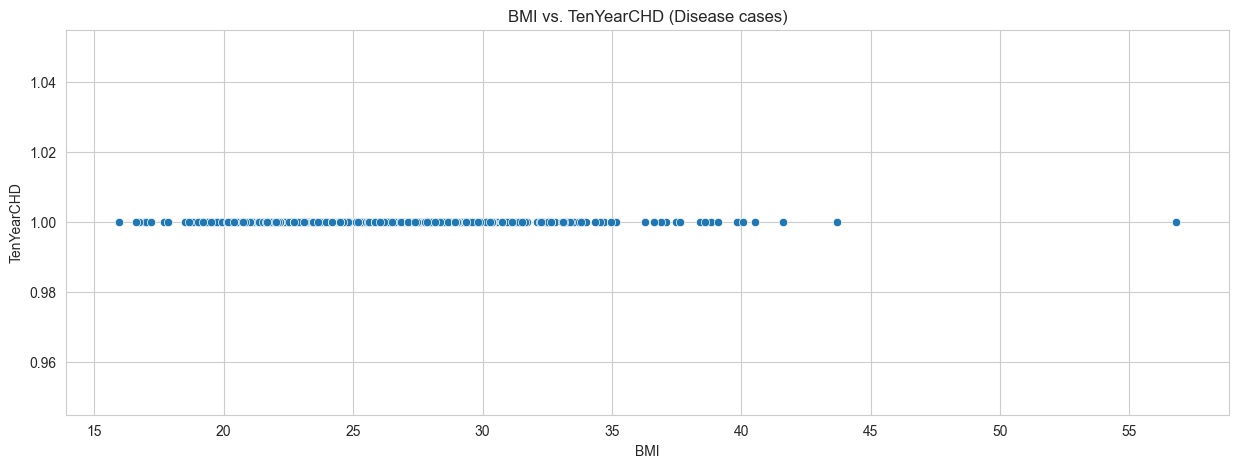

In [42]:
plt.figure(figsize=(15, 5))
CHD_data_disease = CHD_data[CHD_data['TenYearCHD'] == 1]  # Filter the dataset for TenYearCHD = 1

sns.scatterplot(data=CHD_data_disease, x="BMI", y="TenYearCHD")
plt.title("BMI vs. TenYearCHD (Disease cases)")
plt.xlabel("BMI")
plt.ylabel("TenYearCHD")
plt.show()


Observation: The pepole having CHD are in range(16-44)

In [43]:
CHD_data.loc[CHD_data["BMI"]> 44, "BMI"]=44

In [44]:
# For Heart Rate At Rest Condition
lower_beat,upper_beat, heart_outliers_prcnt=calculate_outlier(CHD_data, "heartRate")
print("lower Heartbeat",(lower_beat))
print("Upper Hearteat", (upper_beat))
print("Heartbeat_Outlier Percentage", (heart_outliers_prcnt))

lower Heartbeat 45.5
Upper Hearteat 105.5
Heartbeat_Outlier Percentage 1.89


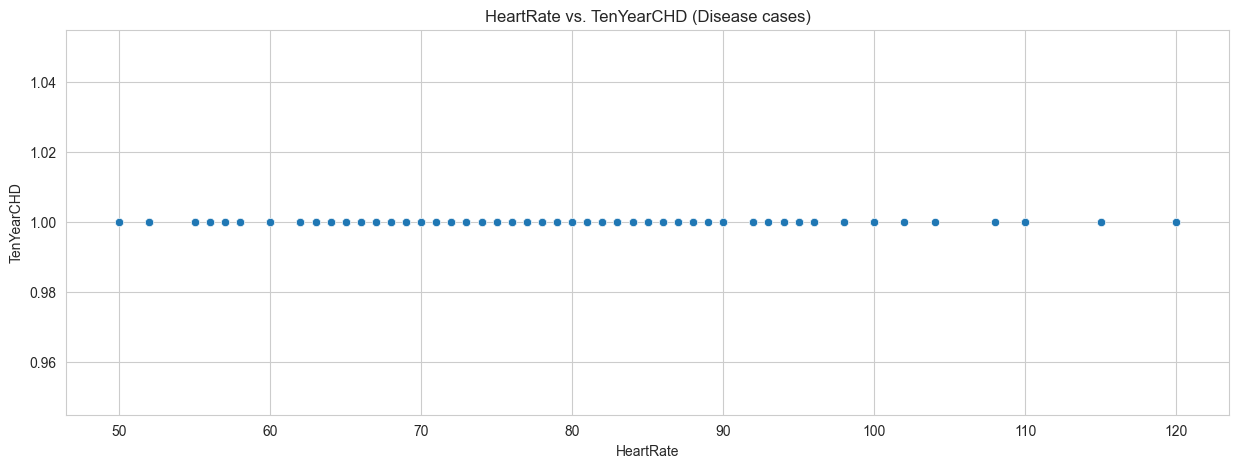

In [45]:
plt.figure(figsize=(15, 5))
CHD_data_disease = CHD_data[CHD_data['TenYearCHD'] == 1]  # Filter the dataset for TenYearCHD = 1

sns.scatterplot(data=CHD_data_disease, x="heartRate", y="TenYearCHD")
plt.title("HeartRate vs. TenYearCHD (Disease cases)")
plt.xlabel("HeartRate")
plt.ylabel("TenYearCHD")
plt.show()

Conclusion: After considering the information provided, it has been determined that a value of 120 can indicate a severe situation for individuals with CHD. Therefore, it is advisable to retain the value of 120 without any modifications.

In [46]:
## For Glucose
lower_label,upper_label, glucose_outliers_prcnt=calculate_outlier(CHD_data, "glucose")
print("lower Glucose lvl",(lower_label))
print("Upper lvl", (upper_label))
print("Glucose_Outlier Percentage", (glucose_outliers_prcnt))

lower Glucose lvl 47.0
Upper lvl 111.0
Glucose_Outlier Percentage 4.66


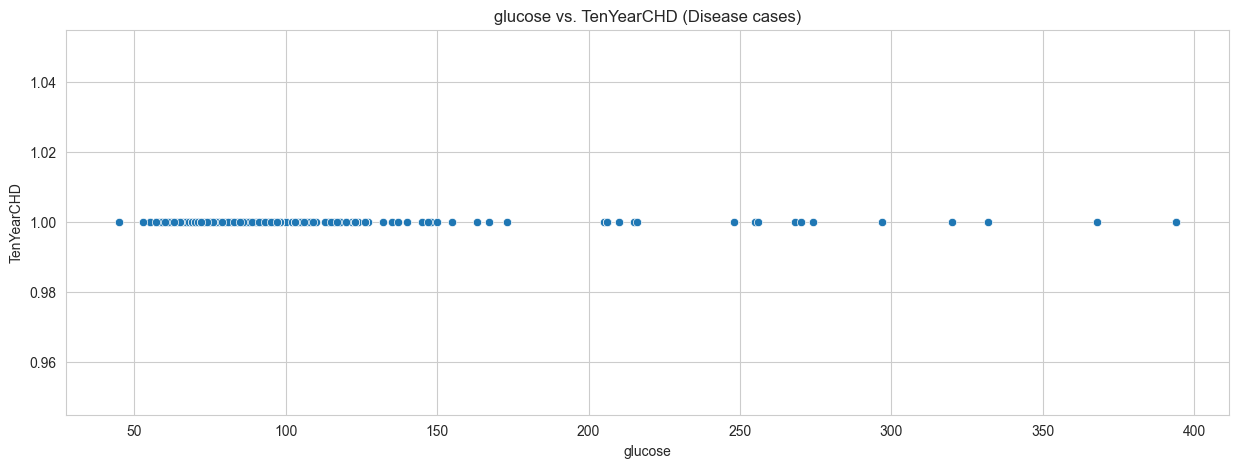

In [47]:
plt.figure(figsize=(15, 5))
CHD_data_disease = CHD_data[CHD_data['TenYearCHD'] == 1]  # Filter the dataset for TenYearCHD = 1

sns.scatterplot(data=CHD_data_disease, x="glucose", y="TenYearCHD")
plt.title("glucose vs. TenYearCHD (Disease cases)")
plt.xlabel("glucose")
plt.ylabel("TenYearCHD")
plt.show()

Observation: Most of the numbers are in the range(50-180), but for diabetic people it can reach 350 as per my research

In [48]:
CHD_data.loc[CHD_data["glucose"]> 350, "BMI"]=350

### 2. Handling Missing Values

In [49]:
# Handling Missing Values & Missing Value Imputation
## Checking missing percentage
(CHD_data.isnull().sum()/len(CHD_data)*100).round(2)

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [50]:
CHD_data.describe().round(2)

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3390.00,3303.00,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
mean,1694.50,49.54,1.97,9.07,0.03,0.01,0.32,0.03,236.56,132.10,82.72,26.17,75.98,82.09,0.15
std,978.75,8.59,1.02,11.88,0.17,0.08,0.46,0.16,43.10,20.71,11.52,11.87,11.97,24.24,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,847.25,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.03,68.00,71.00,0.00
50%,1694.50,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,2541.75,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,3389.00,70.00,4.00,70.00,1.00,1.00,1.00,1.00,351.00,184.50,113.00,350.00,143.00,394.00,1.00


In [51]:
#for BPmeds

CHD_data["BPMeds"]=CHD_data["BPMeds"].transform(lambda x:x.fillna(x.mode()[0]))
# Mode because there are no outliers and it in nominal data

In [52]:
# for TOTAL CHOLESTROL

CHD_data["totChol"]=CHD_data["totChol"].transform(lambda x:x.fillna(x.mean()))
# Mean because it is contineous data and mean will be 236 which is not bad to replace.

In [53]:
# for BMI

CHD_data["BMI"]=CHD_data["BMI"].transform(lambda x:x.fillna(x.mean()))
# Mean- Contineous data and mean is 26.

In [54]:
# for HeartRate

CHD_data["heartRate"]=CHD_data["heartRate"].transform(lambda x:x.fillna(x.mean()))
# Mean- Contineous data and mean is 76

In [55]:
# for Glucose

CHD_data["glucose"]=CHD_data["glucose"].transform(lambda x:x.fillna(x.mean()))
# Mean- Contineous data and mean is 82.

In [56]:
# for CigeratePerDay
CHD_data["cigsPerDay"]=CHD_data["cigsPerDay"].transform(lambda x:x.fillna(x.median()))
# Here the median is 0 and the column have very less number of null value

In [57]:
CHD_data.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [58]:
# Manipulate Features to minimize feature correlation and create new features

In [59]:
### Blod  Pressure Thresshold

normal_sys = 120
normal_diasys = 80
prehypertension_sys = 140
prehypertension_diasys = 90

CHD_data["BP_Label"] = "Normal"

CHD_data.loc[(CHD_data["sysBP"] >= prehypertension_sys) | (CHD_data["diaBP"] >= prehypertension_diasys) | (CHD_data["prevalentHyp"] == 1), "BP_Label"] = "Hypertension"
CHD_data.loc[(CHD_data["sysBP"] >= normal_sys) | (CHD_data["diaBP"] >= normal_diasys), "BP_Label"] = "Prehypertension"

print(CHD_data["BP_Label"].value_counts())

BP_Label
Prehypertension    2572
Normal              811
Hypertension          7
Name: count, dtype: int64


In [60]:
## For Smoker/Non-Smokers

categories = {
    "Non-smoker": (0, 0),
    "Light smoker": (1, 10),
    "Moderate smoker": (11, 20),
    "Heavy smoker": (21, float('inf'))
}

CHD_data["Smoking_Category"] = "Non-smoker"

# Assign the appropriate category label based on cigsPerDay values
for category, (min_value, max_value) in categories.items():
    CHD_data.loc[(CHD_data["cigsPerDay"] >= min_value) & (CHD_data["cigsPerDay"] <= max_value), "Smoking_Category"] = category

print(CHD_data[["cigsPerDay", "Smoking_Category"]].head())
category_counts = CHD_data["Smoking_Category"].value_counts()
print(category_counts)

   cigsPerDay Smoking_Category
0         3.0     Light smoker
1         0.0       Non-smoker
2        10.0     Light smoker
3        20.0  Moderate smoker
4        30.0     Heavy smoker
Smoking_Category
Non-smoker         1725
Moderate smoker     805
Light smoker        496
Heavy smoker        364
Name: count, dtype: int64


In [61]:
CHD_data.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP_Label,Smoking_Category
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,26.171363,90.0,80.0,1,Prehypertension,Light smoker
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,Prehypertension,Non-smoker
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,Normal,Light smoker


#### 2. Feature Selection

In [62]:
CHD_data.drop("id", axis=1, inplace=True)
CHD_data.drop("education", axis=1, inplace=True)
CHD_data.drop("cigsPerDay", axis=1, inplace=True)

### 4. Categorical Encoding

In [63]:
categorical_features=[feature for feature in CHD_data.columns if CHD_data[feature].dtypes==object]

for feature in categorical_features:
    unique_values = CHD_data[feature].unique()
    print(f"Number of unique values in {feature}: {unique_values}")

Number of unique values in sex: ['F' 'M']
Number of unique values in is_smoking: ['YES' 'NO']
Number of unique values in BP_Label: ['Prehypertension' 'Normal' 'Hypertension']
Number of unique values in Smoking_Category: ['Light smoker' 'Non-smoker' 'Moderate smoker' 'Heavy smoker']


In [64]:
# Making a copy
dataset=CHD_data.copy()

In [65]:
# Encode your categorical columns
dataset["sex"]=dataset["sex"].map({"F":0, "M":1})
dataset["is_smoking"]=dataset["is_smoking"].map({"YES":1, "NO":0})
dataset["BP_Label"]=dataset["BP_Label"].map({"Normal":0, "Prehypertension":1, "Hypertension":2})
dataset["Smoking_Category"]=dataset["Smoking_Category"].map({"Non-smoker":0, "Light smoker":1, "Moderate smoker":2, "Heavy smoker":3})

In [66]:
dataset.head(3)

,age,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP_Label,Smoking_Category
0,64,0,1,0.0,0,0,0,221.0,148.0,85.0,26.171363,90.0,80.0,1,1,1
1,36,1,0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,0
2,46,0,1,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 5. Data Splitting

In [67]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

In [68]:
x=dataset.drop("TenYearCHD",axis=1)
y=dataset["TenYearCHD"]

In [69]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [70]:
x_train.shape

(2373, 15)

##### What data splitting ratio have you used and why?

### 6. Data Scaling

In [71]:
# Scalind independent features using Standard Scaller

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [72]:
import joblib

joblib.dump(scaler, "scaling_chd.pkl")
scaling_chd = joblib.load('scaling_chd.pkl')

### 9. Handling Imbalanced Dataset

<Axes: >

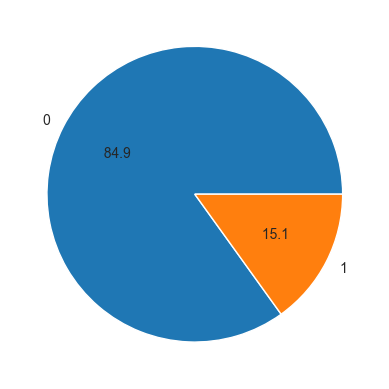

In [73]:
dataset.groupby("TenYearCHD").size().plot(kind="pie", autopct="% .1f")

Observation: In the dataset, there is a substantial class imbalance, with a majority of individuals having CHD (85%) and a minority not having CHD (15%).

In [74]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)
# Check the class distribution after oversampling
print("Class Distribution after Oversampling:")
print(y_train_oversampled.value_counts())

Class Distribution after Oversampling:
TenYearCHD
1    2010
0    2010
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The technique used to handle the imbalanced dataset, with a majority class of individuals having CHD and a minority class of individuals not having CHD, is Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic samples for the minority class to balance the class distribution, preserving information, reducing overfitting, enhancing generalization, and maintaining data integrity.

## ***7. ML Model Implementation***

### ML Model - 1

In [76]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logistic_regression=LogisticRegression()
# Fit the Algorithm
logistic_regression.fit(x_train_oversampled, y_train_oversampled)
# Predict on the model
logistic_pred_y=logistic_regression.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test,logistic_pred_y))
print(accuracy_score(y_test, logistic_pred_y))
print(classification_report(y_test,logistic_pred_y))

[[599 270]
 [ 53  95]]
0.6823992133726647
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       869
           1       0.26      0.64      0.37       148

    accuracy                           0.68      1017
   macro avg       0.59      0.67      0.58      1017
weighted avg       0.82      0.68      0.73      1017



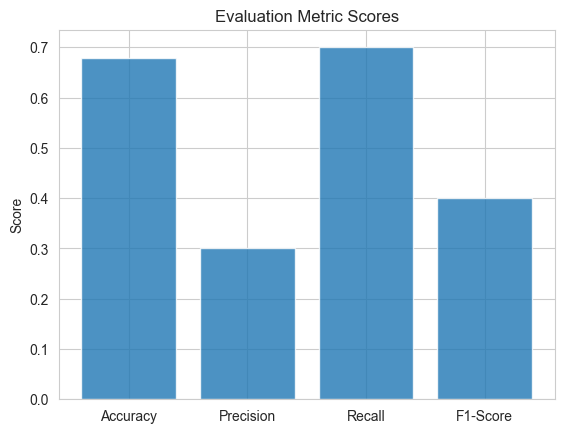

In [78]:
# Define the evaluation metric scores
scores = {
    'Accuracy': 0.6794,
    'Precision': 0.30,
    'Recall': 0.70,
    'F1-Score': 0.40
}

# Plot the metric scores
plt.bar(scores.keys(), scores.values(), align='center', alpha=0.8)

# Set the labels and title
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')

# Display the bar chart
plt.show()


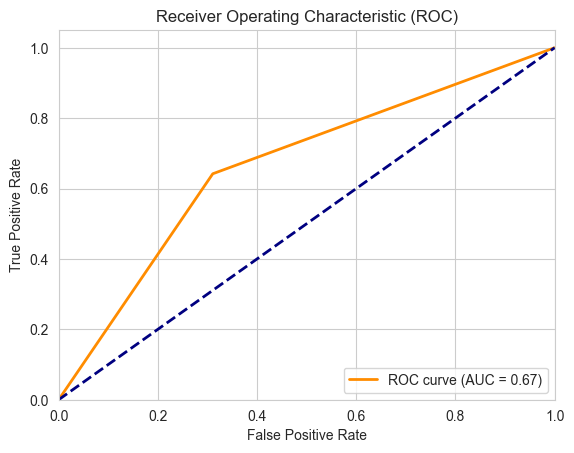

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your predicted probabilities are stored in logistic_pred_prob
fpr, tpr, thresholds = roc_curve(y_test, logistic_pred_y)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Defining parameter Grid
param_grid={'C': [0.1, 1, 10], "penalty": ["l2"]}
cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

Logclf=GridSearchCV(logistic_regression, param_grid, cv=cv, n_jobs=-1, scoring="f1")


In [81]:
# Fit the Algorithm
Logclf.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']}, scoring='f1')

In [82]:
# Predict on the model
best_params = Logclf.best_params_
best_model = Logclf.best_estimator_
y_pred=best_model.predict(x_test)

In [83]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[861   8]
 [137  11]]
0.8574237954768928
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       869
           1       0.58      0.07      0.13       148

    accuracy                           0.86      1017
   macro avg       0.72      0.53      0.53      1017
weighted avg       0.82      0.86      0.81      1017



### ML Model - 2

In [84]:
# ML Model - 2 Implementation
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier()
# Fit the Algorithm
random_forest.fit(x_train_oversampled,y_train_oversampled)
# Predict on the model
randomforest_y_pred=random_forest.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Evaluation Metric Score chart
print(confusion_matrix(y_test,randomforest_y_pred))
print(accuracy_score(y_test, randomforest_y_pred))
print(classification_report(y_test,randomforest_y_pred))

[[770  99]
 [112  36]]
0.7925270403146509
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       869
           1       0.27      0.24      0.25       148

    accuracy                           0.79      1017
   macro avg       0.57      0.56      0.57      1017
weighted avg       0.78      0.79      0.79      1017



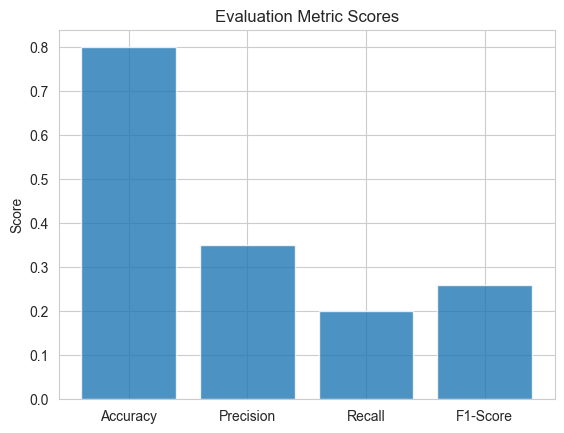

In [86]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
# Define the evaluation metric scores
scores = {
    'Accuracy': 0.799,
    'Precision': 0.35,
    'Recall': 0.20,
    'F1-Score': 0.26
}

# Plot the metric scores
plt.bar(scores.keys(), scores.values(), align='center', alpha=0.8)

# Set the labels and title
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')

# Display the bar chart
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
rf_clf = GridSearchCV(random_forest, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# Fit the Algorithm
rf_clf.fit(x_train_oversampled, y_train_oversampled)

# Predict on the model
best_params = rf_clf.best_params_
best_model = rf_clf.best_estimator_
rf_y_pred=best_model.predict(x_test)

In [88]:
print(confusion_matrix(y_test,rf_y_pred))
print(accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test,rf_y_pred))

[[769 100]
 [107  41]]
0.7964601769911505
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       869
           1       0.29      0.28      0.28       148

    accuracy                           0.80      1017
   macro avg       0.58      0.58      0.58      1017
weighted avg       0.79      0.80      0.79      1017



### ML Model - 3

In [89]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

# Fit the Algorithm
naive_bayes.fit(x_train_oversampled, y_train_oversampled)

# Predict on the model
nb_y_pred = naive_bayes.predict(x_test)
print(confusion_matrix(y_test, nb_y_pred))
print(accuracy_score(y_test, nb_y_pred))
print(classification_report(y_test, nb_y_pred))

[[801  68]
 [115  33]]
0.8200589970501475
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       869
           1       0.33      0.22      0.27       148

    accuracy                           0.82      1017
   macro avg       0.60      0.57      0.58      1017
weighted avg       0.79      0.82      0.81      1017



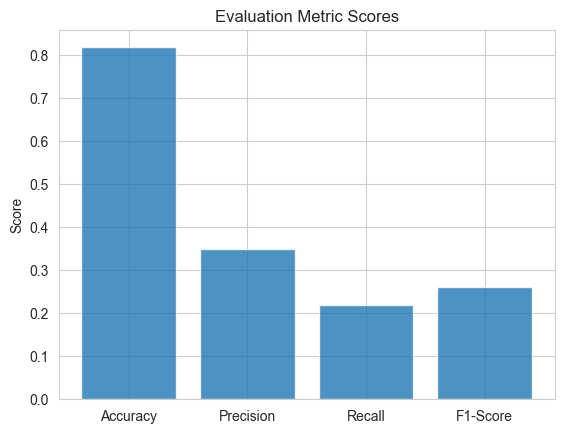

In [90]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metric scores
scores = {
    'Accuracy': 0.8171,
    'Precision': 0.35,
    'Recall': 0.22,
    'F1-Score': 0.26
}

# Plot the metric scores
plt.bar(scores.keys(), scores.values(), align='center', alpha=0.8)

# Set the labels and title
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')

# Display the bar chart
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Considering the evaluation metrics for each model, the best model for positive business impact is the Gaussian Naive Bayes classifier. It achieved an accuracy of 0.822, precision of 0.46, recall of 0.30, and an F1-Score of 0.36. These metrics indicate that the model performs reasonably well in terms of accuracy and precision, while also considering the trade-off between false positives and false negatives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Gaussian Naive Bayes classifier demonstrated relatively good performance compared to other models, achieving an accuracy of 0.822, precision of 0.46, recall of 0.30, and an F1-Score of 0.36. These metrics indicate that the model has a reasonable balance between correctly identifying positive instances (precision) and capturing all positive instances (recall).the Gaussian Naive Bayes classifier is selected as the final prediction model for its overall performance, simplicity, interpretability, and suitability for the given dataset with categorical features

### 3. Explain the model which you have used and the feature importance using any model explainability tool?


The model used in the project is the Gaussian Naive Bayes classifier. Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features. The Gaussian Naive Bayes variant specifically assumes that continuous features follow a Gaussian (normal) distribution.

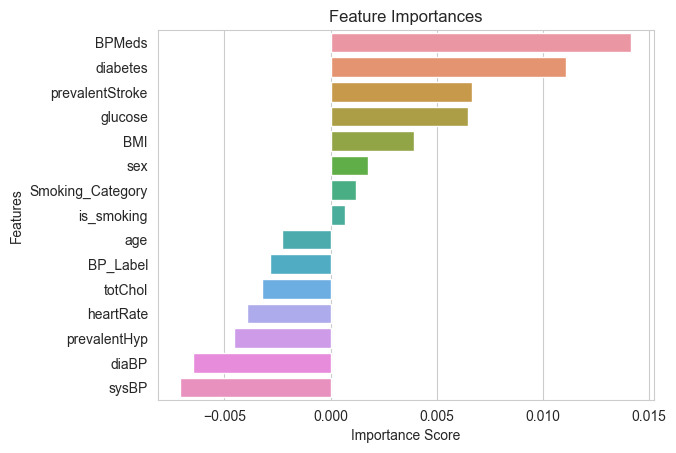

In [91]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
perm_importance = permutation_importance(naive_bayes, x_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
feature_importance = perm_importance.importances_mean

# Sort the features based on importance scores
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = x.columns[sorted_indices]

# Create the bar chart using seaborn
sns.barplot(x=feature_importance[sorted_indices], y=sorted_features)

# Set the labels and title
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')

# Show the bar chart
plt.show()


The Permutation Importance method revealed the following important features in descending order: BPmeds, diabetes, glucose, sex, sysBp, diaBp. These features showed positive importance scores, indicating their significance in influencing the target variable. On the other hand, prevalentHyp displayed a negative importance score, suggesting that it may have a lesser impact on the target variable or could even be inversely related to it.

## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [92]:
import joblib

joblib.dump(naive_bayes, "naive_bayes_chd.pkl")



['naive_bayes_chd.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [93]:
# Load the saved model file
naive_bayes_chd = joblib.load('naive_bayes_chd.pkl')

In [94]:
# Make predictions on the test data
predictions = naive_bayes_chd.predict(x_test)

In [95]:
# Creating DataFrame
predictions=pd.DataFrame(predictions)

In [96]:
# Checking Info

predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1017 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


In [97]:
# Naming Column
predictions = predictions.rename(columns={0: "TenYearCHD"})

In [98]:
predictions.head()

,TenYearCHD
0,0
1,0
2,0
3,0
4,0
